# **Titanic**: **Machine Learning from Disaster**
## Submited BY: ARNAB DEY


#### Download the dataset from:
https://www.kaggle.com/c/titanic/data

# Importing Libraries and Reading the dataset

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
Test = pd.read_csv('test.csv')

In [ ]:
Train = pd.read_csv('train.csv')

In [ ]:
Test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
Train.shape #Rows and Columns

(891, 12)

In [ ]:
Train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Null Value threatment 

In [ ]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
Train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
Train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
Train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
# Filling the missing values with maximum counted value as 's'
Train['Embarked'].fillna(Train['Embarked'].value_counts().idxmax(),inplace=True)

In [ ]:
# Filling the missing values with mean value of Age.
Train['Age'].fillna(Train['Age'].mean(),inplace=True)

In [ ]:
# Droping 'cabin' as it has so many missing values.
Train.drop('Cabin',axis=1,inplace=True)

In [ ]:
# After missing value Treatment.
Train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Checking for Outliers

In [ ]:
# Checking for outliers in the continuous variables
df = Train[[ 'Pclass', 'Age', 'SibSp','Parch', 'Fare', ]]
# Checking outliers at 25%, 50%, 75%, 90%, 95%, and 99% 
df.describe(percentiles=[.25, .5, .75, .90, .95, .99])        

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,29.699118,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
90%,3.000000,47.000000,1.000000,2.000000,77.958300
95%,3.000000,54.000000,3.000000,2.000000,112.079150
99%,3.000000,65.000000,5.000000,4.000000,249.006220


From the distribution show above, we can see there are no outliers in the data set as the numbers are gradually increasing.

In [ ]:
# Droping the 'Name' as it has many unique values.
Train.drop('Name',axis=1,inplace=True)

In [ ]:
Train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [ ]:
Train['Ticket'].value_counts()

CA. 2343              7
1601                  7
347082                7
3101295               6
CA 2144               6
                     ..
SOTON/O.Q. 3101305    1
248706                1
11752                 1
SC 1748               1
349245                1
Name: Ticket, Length: 681, dtype: int64

# Replacing 'Male' as 0 and 'Female' as 1

In [ ]:
genders = {"male": 0, "female": 1}
data = [Train, Test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [ ]:
Train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,1,35.0,1,0,113803,53.1000,S
4,5,0,3,0,35.0,0,0,373450,8.0500,S


# Inspecting the dataset again.

In [ ]:
Train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
Train['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [ ]:
#Ticket column has 681 unique values , so it is not use full to create dummy variable of it.
# We will drop this Ticket column.
Train.drop('Ticket',axis=1,inplace=True)

In [ ]:
Train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


# Making Dummy variables.

In [ ]:
#As there are no unique columns in the data set we will create the dummy variable for our data set.
Train = pd.get_dummies(Train)
Train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.000000,1,0,7.2500,0,0,1
1,2,1,1,1,38.000000,1,0,71.2833,1,0,0
2,3,1,3,1,26.000000,0,0,7.9250,0,0,1
3,4,1,1,1,35.000000,1,0,53.1000,0,0,1
4,5,0,3,0,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,13.0000,0,0,1
887,888,1,1,1,19.000000,0,0,30.0000,0,0,1
888,889,0,3,1,29.699118,1,2,23.4500,0,0,1
889,890,1,1,0,26.000000,0,0,30.0000,1,0,0


# Data Visualization 
### Looking at Correlations


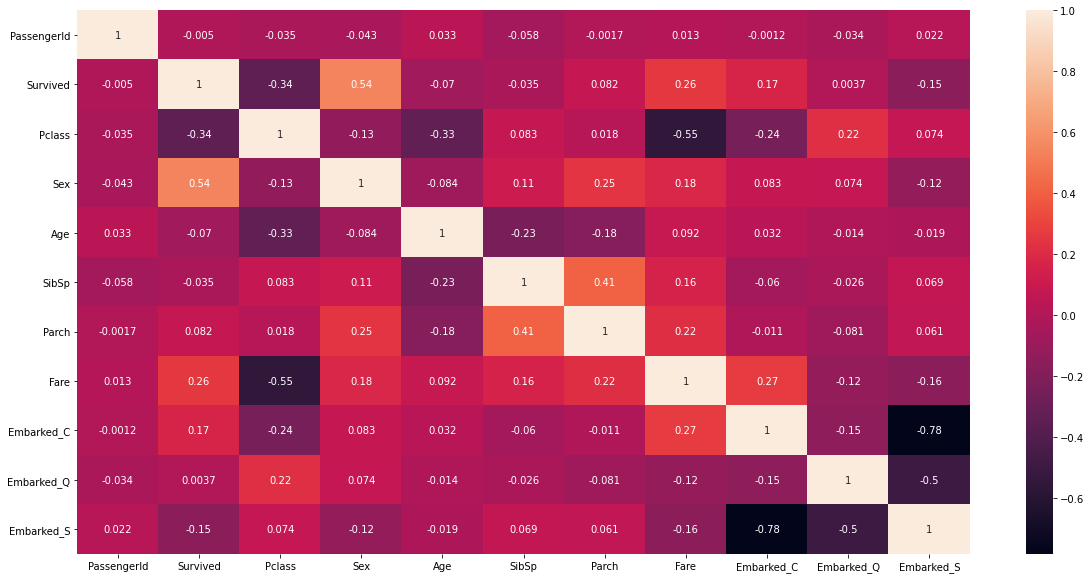

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Let's see the correlation matrix
plt.figure(figsize = (20,10)) # Size of the figure
sns.heatmap(Train.corr(),annot = True)
plt.show()

Corelation is almost good , we can use these columns .

# Creating x_train and y_train for our Training dataset.

In [ ]:
y_train = Train.pop('Survived')
X_train = Train

Running our First Training Model

In [ ]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      881
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -392.35
Date:                Tue, 25 Aug 2020   Deviance:                       784.71
Time:                        10:35:14   Pearson chi2:                     904.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.7742      0.404      4.387      0.000       0.982       2.567
PassengerId  9.491e-05      0.000      0.272      0.786      -0.001       0.001
Pclass         -1.1012      0.144     -7.664      0.000      -1.383      -0.820
Sex             2.7306      0.201     13.579      0.000       2.336       3.125
Age            -0.0397      0.008     -5.063      0.000      -0.055      -0.024
SibSp          -0.3251      0.110     -2.966      0.003      -0.540      -0.110
Parch          -0.0970      0.119     -0.814      0.416      -0.331       0.137
Fare            0.0020      0.002      0.824      0.410      -0.003       0.007
Embarked_C      0.7398      0.210      3.527      0.000       0.329       1.151
Embarked_Q      0.7084      0.294      2.407      0.016       0.132       1.285
Embarked_S      0.3260      0.166      1.967      0.049       0.001       0.651
===============================================================================
"""

Few columns have high P>|Z| ,'P' values so we can not accept this model.

# Feature selection using RFE

In [ ]:
#Feature Selection using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 8) # running RFE with 7 variables as output
rfe = rfe.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
rfe.support_

array([False,  True,  True,  True,  True,  True, False,  True,  True,
        True])

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('PassengerId', False, 3),
 ('Pclass', True, 1),
 ('Sex', True, 1),
 ('Age', True, 1),
 ('SibSp', True, 1),
 ('Parch', True, 1),
 ('Fare', False, 2),
 ('Embarked_C', True, 1),
 ('Embarked_Q', True, 1),
 ('Embarked_S', True, 1)]

In [ ]:
col = X_train.columns[rfe.support_]

In [ ]:
X_train.columns[~rfe.support_]

Index(['PassengerId', 'Fare'], dtype='object')

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      883
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -392.75
Date:                Tue, 25 Aug 2020   Deviance:                       785.50
Time:                        10:35:14   Pearson chi2:                     908.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9533      0.344      5.675      0.000       1.279       2.628
Pclass        -1.1610      0.125     -9.256      0.000      -1.407      -0.915
Sex            2.7295      0.200     13.620      0.000       2.337       3.122
Age           -0.0399      0.008     -5.101      0.000      -0.055      -0.025
SibSp         -0.3141      0.108     -2.901      0.004      -0.526      -0.102
Parch         -0.0737      0.116     -0.635      0.525      -0.301       0.154
Embarked_C     0.8195      0.189      4.336      0.000       0.449       1.190
Embarked_Q     0.7673      0.286      2.681      0.007       0.206       1.328
Embarked_S     0.3664      0.156      2.349      0.019       0.061       0.672
==============================================================================
"""

In [ ]:
X_train.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
X_train_sm.columns

Index(['const', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

Droping 'Parch' as it has higher p value.

In [ ]:
X_train_sm = X_train_sm.drop(['Parch'],axis=1)

In [ ]:
X_train_sm.columns

Index(['const', 'Pclass', 'Sex', 'Age', 'SibSp', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

**Again fitting the model**

In [ ]:
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      884
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -392.95
Date:                Tue, 25 Aug 2020   Deviance:                       785.91
Time:                        10:35:14   Pearson chi2:                     912.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9467      0.344      5.658      0.000       1.272       2.621
Pclass        -1.1625      0.126     -9.260      0.000      -1.409      -0.916
Sex            2.7020      0.195     13.847      0.000       2.320       3.084
Age           -0.0397      0.008     -5.082      0.000      -0.055      -0.024
SibSp         -0.3346      0.104     -3.221      0.001      -0.538      -0.131
Embarked_C     0.8078      0.188      4.300      0.000       0.440       1.176
Embarked_Q     0.7809      0.285      2.738      0.006       0.222       1.340
Embarked_S     0.3579      0.155      2.302      0.021       0.053       0.663
==============================================================================
"""

**As there are no high P values we can use this model as of now.**

In [ ]:
y_train_pred = res.predict(X_train_sm)

In [ ]:
y_train_pred[:10]


0    0.083941
1    0.920742
2    0.619637
3    0.892978
4    0.071037
5    0.125908
6    0.269083
7    0.093970
8    0.610247
9    0.903931
dtype: float64

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]


array([0.0839414 , 0.92074213, 0.61963696, 0.8929778 , 0.07103732,
       0.12590776, 0.26908295, 0.09397043, 0.61024732, 0.90393123])

In [ ]:
y_train_pred_final = pd.DataFrame({'Survived':y_train.values, 'Survived_Prob':y_train_pred})
y_train_pred_final['PassengerId'] = y_train.index
y_train_pred_final.head()


,Survived,Survived_Prob,PassengerId
0,0,0.083941,0
1,1,0.920742,1
2,1,0.619637,2
3,1,0.892978,3
4,0,0.071037,4


In [ ]:
#Creating new column ‘Survived_Pred’ with 1 if Survived_Prob > 0.5 else 0
y_train_pred_final['Survived_Pred'] = y_train_pred_final.Survived_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Survived,Survived_Prob,PassengerId,Survived_Pred
0,0,0.083941,0,0
1,1,0.920742,1,1
2,1,0.619637,2,1
3,1,0.892978,3,1
4,0,0.071037,4,0


In [ ]:
from sklearn import metrics

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.Survived_Pred )
print(confusion)


[[471  78]
 [ 98 244]]


In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.Survived_Pred ))

0.8024691358024691


# Checking VIF

In [ ]:
# Check for the VIF values of the feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

In [ ]:
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Embarked_S,18.61
5,Embarked_C,4.88
6,Embarked_Q,3.74
0,Pclass,1.29
4,Parch,1.29
3,SibSp,1.25
2,Age,1.21
1,Sex,1.12


**Droping column 'Embarked_S' as it has higher VIF value.**

In [ ]:
col = col.drop('Embarked_S', 1)
col


Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q'], dtype='object')

**Droping column 'Parch' as we have droped it before for higher p values.**

In [ ]:
col = col.drop('Parch',1)
col

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked_C', 'Embarked_Q'], dtype='object')

In [ ]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      884
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -392.95
Date:                Tue, 25 Aug 2020   Deviance:                       785.91
Time:                        10:35:14   Pearson chi2:                     912.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3046      0.442      5.212      0.000       1.438       3.171
Pclass        -1.1625      0.126     -9.260      0.000      -1.409      -0.916
Sex            2.7020      0.195     13.847      0.000       2.320       3.084
Age           -0.0397      0.008     -5.082      0.000      -0.055      -0.024
SibSp         -0.3346      0.104     -3.221      0.001      -0.538      -0.131
Embarked_C     0.4499      0.232      1.942      0.052      -0.004       0.904
Embarked_Q     0.4230      0.327      1.295      0.195      -0.217       1.063
==============================================================================
"""

In [ ]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [ ]:
y_train_pred[:10]

array([0.0839414 , 0.92074213, 0.61963696, 0.8929778 , 0.07103732,
       0.12590776, 0.26908295, 0.09397043, 0.61024732, 0.90393123])

In [ ]:
y_train_pred_final['Survived_Prob'] = y_train_pred

In [ ]:
# #Creating new column ‘Survived_Pred’ with 1 if Survived_Prob > 0.5 else 0
y_train_pred_final['Survived_Pred'] = y_train_pred_final.Survived_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Survived,Survived_Prob,PassengerId,Survived_Pred
0,0,0.083941,0,0
1,1,0.920742,1,1
2,1,0.619637,2,1
3,1,0.892978,3,1
4,0,0.071037,4,0


In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.Survived_Pred )
print(confusion)

[[471  78]
 [ 98 244]]


In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.Survived_Pred ))

0.8024691358024691


In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Pclass,3.61
2,Age,3.31
1,Sex,1.51
3,SibSp,1.27
4,Embarked_C,1.25
5,Embarked_Q,1.17


**Now VIF values are normal.**

In [ ]:
# Let's take a look at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.Survived_Pred )
confusion


array([[471,  78],
       [ 98, 244]])

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.Survived_Pred)

0.8024691358024691

Metrics beyond simply accuracy

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7134502923976608

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)


0.8579234972677595

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))


0.14207650273224043


In [ ]:
# positive predictive value
print (TP / float(TP+FP))


0.7577639751552795


In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))


0.827768014059754


# Plotting the ROC Curve


In [ ]:
def draw_roc( actual, probs ):
    fpr ,tpr , thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Survived, y_train_pred_final.Survived_Pred)

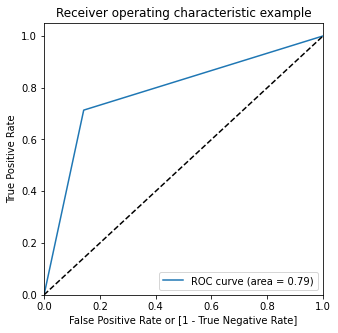

In [ ]:
draw_roc(y_train_pred_final.Survived, y_train_pred_final.Survived_Pred)

##  Finding Optimal Cutoff Point

In [ ]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Survived_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()


,Survived,Survived_Prob,PassengerId,Survived_Pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.083941,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0.920742,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.619637,2,1,1,1,1,1,1,1,1,0,0,0
3,1,0.892978,3,1,1,1,1,1,1,1,1,1,1,0
4,0,0.071037,4,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

In [ ]:
# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383838  1.000000  0.000000
0.1   0.1  0.557800  0.923977  0.329690
0.2   0.2  0.712682  0.850877  0.626594
0.3   0.3  0.772166  0.824561  0.739526
0.4   0.4  0.789001  0.763158  0.805100
0.5   0.5  0.802469  0.713450  0.857923
0.6   0.6  0.815937  0.657895  0.914390
0.7   0.7  0.792368  0.505848  0.970856
0.8   0.8  0.756453  0.380117  0.990893
0.9   0.9  0.691358  0.204678  0.994536


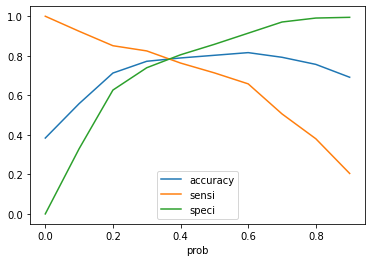

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

***From the curve above, 0.35 is the optimum point to take it as a cutoff probability***

In [ ]:
#From the curve above, 0.35 is the optimum point to take it as a cutoff probability
y_train_pred_final['final_predicted'] = y_train_pred_final.Survived_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Survived,Survived_Prob,PassengerId,Survived_Pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.083941,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.920742,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.619637,2,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.892978,3,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.071037,4,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.final_predicted)

0.7878787878787878

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.final_predicted )
confusion2

array([[435, 114],
       [ 75, 267]])

In [ ]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7807017543859649

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.7923497267759563

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.20765027322404372


In [ ]:
# Positive predictive value
print (TP / float(TP+FP))

0.7007874015748031


In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8529411764705882


# Precision and Recall

In [ ]:
confusion = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.final_predicted )
confusion

array([[435, 114],
       [ 75, 267]])

### Precision TP / TP + FP

In [ ]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7007874015748031

### Recall TP / TP + FN

In [ ]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7807017543859649

## Precision and recall tradeoff

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
y_train_pred_final.Survived, y_train_pred_final.final_predicted

(0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64, 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    1
 889    1
 890    0
 Name: final_predicted, Length: 891, dtype: int64)

In [ ]:
 p, r, thresholds = precision_recall_curve(y_train_pred_final.Survived, y_train_pred_final.final_predicted )

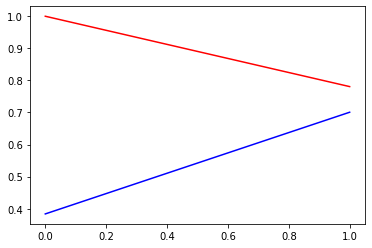

In [ ]:
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


# Making predictions on the test set

In [ ]:
X_test = Test
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
X_test.shape


(418, 11)

In [ ]:
X_test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,0.363636,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,0.481622,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,1.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
col

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked_C', 'Embarked_Q'], dtype='object')

**Treating our Test dataset similar as Train dataset.**

In [ ]:
Test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
Test['Embarked'].fillna(Test['Embarked'].value_counts().idxmax(),inplace=True)

In [ ]:
Test['Age'].fillna(Test['Age'].mean(),inplace=True)

In [ ]:
Test.drop('Cabin',axis=1,inplace=True)

In [ ]:
Test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [ ]:
Test['Fare'].fillna(Test['Fare'].mean(),inplace=True)

In [ ]:
Test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
Test.drop('Name',axis=1,inplace=True)

In [ ]:
Test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,0,34.5,0,0,330911,7.8292,Q
1,893,3,1,47.0,1,0,363272,7.0000,S
2,894,2,0,62.0,0,0,240276,9.6875,Q
3,895,3,0,27.0,0,0,315154,8.6625,S
4,896,3,1,22.0,1,1,3101298,12.2875,S


In [ ]:
Test.drop('Ticket',axis=1,inplace=True)

In [ ]:
Test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,Q
1,893,3,1,47.0,1,0,7.0000,S
2,894,2,0,62.0,0,0,9.6875,Q
3,895,3,0,27.0,0,0,8.6625,S
4,896,3,1,22.0,1,1,12.2875,S


In [ ]:
Test = pd.get_dummies(Test)
Test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,34.50000,0,0,7.8292,0,1,0
1,893,3,1,47.00000,1,0,7.0000,0,0,1
2,894,2,0,62.00000,0,0,9.6875,0,1,0
3,895,3,0,27.00000,0,0,8.6625,0,0,1
4,896,3,1,22.00000,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,30.27259,0,0,8.0500,0,0,1
414,1306,1,1,39.00000,0,0,108.9000,1,0,0
415,1307,3,0,38.50000,0,0,7.2500,0,0,1
416,1308,3,0,30.27259,0,0,8.0500,0,0,1


In [ ]:
X_test = Test

In [ ]:
X_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,34.5,0,0,7.8292,0,1,0
1,893,3,1,47.0,1,0,7.0000,0,0,1
2,894,2,0,62.0,0,0,9.6875,0,1,0
3,895,3,0,27.0,0,0,8.6625,0,0,1
4,896,3,1,22.0,1,1,12.2875,0,0,1


In [ ]:
Test.drop(['PassengerId','Parch','Fare','Embarked_S'],axis=1,inplace=True)

In [ ]:
Test.head()

,Pclass,Sex,Age,SibSp,Embarked_C,Embarked_Q
0,3,0,34.5,0,0,1
1,3,1,47.0,1,0,0
2,2,0,62.0,0,0,1
3,3,0,27.0,0,0,0
4,3,1,22.0,1,0,0


In [ ]:
X_test = Test

In [ ]:
X_test

,Pclass,Sex,Age,SibSp,Embarked_C,Embarked_Q
0,3,0,34.50000,0,0,1
1,3,1,47.00000,1,0,0
2,2,0,62.00000,0,0,1
3,3,0,27.00000,0,0,0
4,3,1,22.00000,1,0,0
...,...,...,...,...,...,...
413,3,0,30.27259,0,0,0
414,1,1,39.00000,0,1,0
415,3,0,38.50000,0,0,0
416,3,0,30.27259,0,0,0


In [ ]:
X_test_sm = sm.add_constant(X_test)

In [ ]:
y_test_pred = res.predict(X_test_sm)

In [ ]:
y_test_pred[:10]

0    0.106403
1    0.336399
2    0.113445
3    0.095038
4    0.577375
5    0.149555
6    0.679702
7    0.200037
8    0.778193
9    0.063869
dtype: float64

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Let's see the head
y_pred_1.head()

,0
0,0.106403
1,0.336399
2,0.113445
3,0.095038
4,0.577375


In [ ]:
y_pred_1 = y_test_pred.values.reshape(-1)
y_test_pred[:10]

0    0.106403
1    0.336399
2    0.113445
3    0.095038
4    0.577375
5    0.149555
6    0.679702
7    0.200037
8    0.778193
9    0.063869
dtype: float64

In [ ]:
y_pred_2 = y_test_pred

In [ ]:
y_pred_2.head()

0    0.106403
1    0.336399
2    0.113445
3    0.095038
4    0.577375
dtype: float64

In [ ]:
df = pd.read_csv('gender_submission.csv')

In [ ]:
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
y_test_df = pd.DataFrame(df)

In [ ]:
y_test_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
y_pred_df = pd.DataFrame(y_pred_1)

In [ ]:
y_pred_df

,0
0,0.106403
1,0.336399
2,0.113445
3,0.095038
4,0.577375
...,...
413,0.084448
414,0.939769
415,0.062406
416,0.084448


In [ ]:
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

In [ ]:
y_pred_final

,PassengerId,Survived,0
0,892,0,0.106403
1,893,1,0.336399
2,894,0,0.113445
3,895,0,0.095038
4,896,1,0.577375
...,...,...,...
413,1305,0,0.084448
414,1306,1,0.939769
415,1307,0,0.062406
416,1308,0,0.084448


In [ ]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Survived_Prob'})

In [ ]:
# Let's see the head of y_pred_final
y_pred_final.head()


,PassengerId,Survived,Survived_Prob
0,892,0,0.106403
1,893,1,0.336399
2,894,0,0.113445
3,895,0,0.095038
4,896,1,0.577375


In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Survived_Prob.map(lambda x: 1 if x > 0.35 else 0 )

In [ ]:
y_pred_final.head()

,PassengerId,Survived,Survived_Prob,final_predicted
0,892,0,0.106403,0
1,893,1,0.336399,0
2,894,0,0.113445,0
3,895,0,0.095038,0
4,896,1,0.577375,1


In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Survived, y_pred_final.final_predicted)

0.8875598086124402

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Survived, y_pred_final.final_predicted)
confusion2

array([[222,  44],
       [  3, 149]])

In [ ]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9802631578947368

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)


0.8345864661654135

## Creating a csv file

In [ ]:
final = pd.DataFrame(y_pred_final)

In [ ]:
final.to_csv('final output.csv')